In [44]:
import pandas as pd
import numpy as np
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

In [45]:
# CSV 파일 불러오기
file_path = 'data/nomal/STFMK-20201105-LW15-2055_20201125_163909_004.csv'
data = pd.read_csv(file_path)

In [51]:
data.tail()

,x,y
11995,2.99875,-0.004873
11996,2.99900,-0.002416
11997,2.99925,-0.006464
11998,2.99950,0.000665
11999,2.99975,0.005422


In [47]:
# 시간과 주파수 데이터 추출
time = data['x'].values
frequency = data['y'].values

In [60]:
# 시간-주파수 데이터를 spectrogram으로 변환
f, t, Sxx = spectrogram(frequency, fs=1/(time[1]-time[0]))

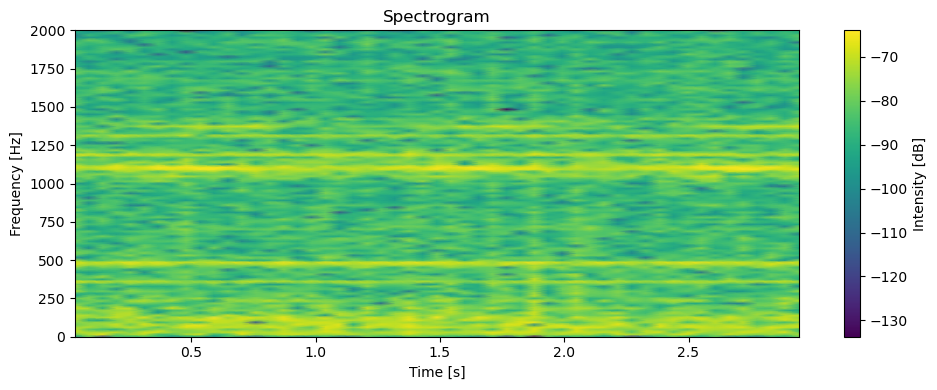

In [66]:
# Spectrogram 그래프로 표현
plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensity [dB]')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.tight_layout()
plt.show()

In [67]:
# FFT 변환
N = len(frequency)  # 데이터 포인트의 개수
T = 1.0 / N  # 샘플링 간격
xf = np.fft.fftfreq(N, T)[:N//2]  # 주파수 범위
yf = np.fft.fft(frequency)  # FFT 수행
yf = 2.0/N * np.abs(yf[:N//2])  # 양쪽 대칭인 부분 제외하고 절반만 사용

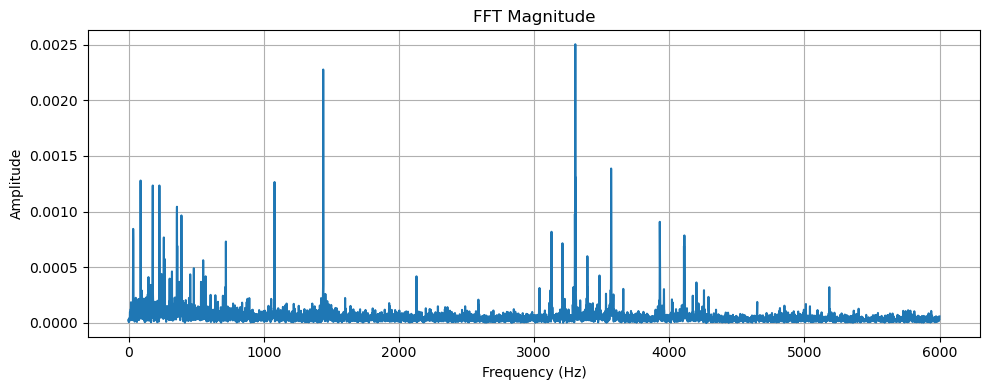

In [68]:
# FFT 결과 그래프로 표현
plt.figure(figsize=(10, 4))
plt.plot(xf, yf)
plt.title('FFT Magnitude')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()